In [ ]:
!pip install PyDrive

In [ ]:
!pip install nltk

In [ ]:
!pip install spacy

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import re 
from spacy.lang.en import English
import spacy
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from nltk.tokenize import sent_tokenize, word_tokenize
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer 
from keras.preprocessing.text import Tokenizer

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
%matplotlib inline

In [13]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

downloaded = drive.CreateFile({'id': '1m1or1uGlB7JKVf9llNdk_OgmO9yNbvpN'})
downloaded.GetContentFile('vault.csv')

In [14]:
df = pd.read_csv('vault.csv', lineterminator='\n')
df.head()

Unnamed: 0                                    title  ... tag 21 tag 22
0           0                       The Softening Pool  ...    NaN    NaN
1           1                           Molasses-Mania  ...    NaN    NaN
2           2                           Tea for Twenty  ...    NaN    NaN
3           3  Honestly I Can't Think of One Right Now  ...    NaN    NaN
4           4                               Just Relax  ...    NaN    NaN

[5 rows x 49 columns]

In [16]:
df.columns

Index(['Unnamed: 0', 'title', 'author', 'substance', 'pub date', 'description',
       'body weight', 'dose', 'tag', 'tag 1', 'tag 2', 'tag 3', 'tag 4',
       'dose 1', 'dose 2', 'tag 5', 'tag 6', 'dose 3', 'dose 4', 'dose 5',
       'dose 6', 'dose 7', 'dose 8', 'dose 9', 'dose 10', 'dose 11', 'dose 12',
       'dose 13', 'dose 14', 'dose 15', 'tag 7', 'tag 8', 'tag 9', 'tag 10',
       'tag 11', 'tag 12', 'tag 13', 'tag 14', 'dose 16', 'dose 17', 'dose 18',
       'tag 15', 'tag 16', 'tag 17', 'tag 18', 'tag 19', 'tag 20', 'tag 21',
       'tag 22'],
      dtype='object')

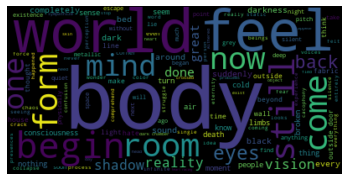

In [32]:
from wordcloud import WordCloud , STOPWORDS, ImageColorGenerator
pd.set_option('display.max_colwidth', None)

dc = df.dropna(subset=['description'])
dc.head()


text = dc.description[3]

wordcloud = WordCloud().generate(text)

plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12263 entries, 0 to 12262
Data columns (total 49 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   12263 non-null  int64  
 1   title        12263 non-null  object 
 2   author       12260 non-null  object 
 3   substance    12263 non-null  object 
 4   pub date     12263 non-null  object 
 5   description  4637 non-null   object 
 6   body weight  4640 non-null   object 
 7   dose         0 non-null      float64
 8   tag          0 non-null      float64
 9   tag 1        4640 non-null   object 
 10  tag 2        4635 non-null   object 
 11  tag 3        3844 non-null   object 
 12  tag 4        2505 non-null   object 
 13  dose 1       4314 non-null   object 
 14  dose 2       2304 non-null   object 
 15  tag 5        1459 non-null   object 
 16  tag 6        768 non-null    object 
 17  dose 3       1251 non-null   object 
 18  dose 4       703 non-null    object 
 19  dose

In [34]:
df.isnull().sum()

Unnamed: 0         0
title              0
author             3
substance          0
pub date           0
description     7626
body weight     7623
dose           12263
tag            12263
tag 1           7623
tag 2           7628
tag 3           8419
tag 4           9758
dose 1          7949
dose 2          9959
tag 5          10804
tag 6          11495
dose 3         11012
dose 4         11560
dose 5         11865
dose 6         12016
dose 7         12105
dose 8         12162
dose 9         12197
dose 10        12224
dose 11        12236
dose 12        12244
dose 13        12254
dose 14        12255
dose 15        12261
tag 7          11876
tag 8          12059
tag 9          12158
tag 10         12216
tag 11         12240
tag 12         12250
tag 13         12257
tag 14         12260
dose 16        12262
dose 17        12262
dose 18        12262
tag 15         12261
tag 16         12261
tag 17         12261
tag 18         12262
tag 19         12262
tag 20         12262
tag 21       

In [35]:
df['body weight'].nunique()

258

In [36]:
df2 = df[['title', 'author','substance','pub date','description']]
df2.head(5)

title  ...                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

In [37]:
df2.dropna(inplace=True)
df2.head(5)

title  ...                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

In [38]:
sb = df2['substance'].values.tolist()
sb = [x for x in sb]
print(sb)

sbset = set(sb)
print('Total substances : ', len(sb))
print('Number of Unique substances: ', len(sbset))
print(sbset)

['3-Cl-PCP', "3-MeO-PCE, 3-MeO-PCP, 2-Fluorodeschloroketamine, & 2'-Oxo-PCE", "2'-Oxo-PCE", '4-AcO-DPT & 3-HO-PCP', 'Floatation Tank & Esketamine', 'Ketamine & 3-MeO-PCP', '1P-LSD', 'DMT & Changa', '6-APB', '6-APB', 'Ibogaine', 'DOC', 'Ketamine & S-Ketamine', 'Cannabis', 'MDMA', 'LSD', 'DOET & Nitrous Oxide', 'Nitrous Oxide', '4-AcO-DMT & Cannabis', 'Ketamine, 25I-NBOMe & 25C-NBOMe', 'DMT & Methoxetamine', 'Ayahuasca', 'Ayahuasca (B. caapi & P. viridis), Magic Mushrooms, Amanita muscaria, & Syrian Rue', 'MDMA, LSD & Cannabis', 'Salvia divinorum', 'DPT', 'LSD & Massage', 'Ibogaine', 'Mushrooms', 'DPT', 'Salvia divinorum', 'Syrian Rue, Cacti - T. peruvianus, 2C-E, 4-AcO-DMT & DMT', 'DMT', '5-MeO-DMT', '5-MeO-DiPT', '4-AcO-DMT & Syrian Rue', 'Salvia divinorum', 'DiPT & Salvia divinorum (20x extract)', '5-MeO-DMT', '2C-I', 'DOC', '2C-E, Cannabis, Choline, DMAE, Kratom & Piracetam', 'Salvia divinorum (10x extract)', 'DPT & Cannabis', 'Salvia Divinorum', '2C-E', 'Cacti - T. peruvianus', 'Syr

In [39]:
sb = pd.DataFrame(sb)
df2['substance'] = sb
df2.head(5)

title  ...                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

In [42]:
sb_unique = df2[['substance']].sort_values('substance').drop_duplicates()
sb_unique.dropna()

sb_list = list()
for i in sb_unique['substance']:
  sb_list.append(i)

for i in sb_list:
  print(i)

	 Products - Spice and Synthetic Cannabinoids
 25C-NBOMe
 Clonazepam & Amphetamines (Dexedrine)
 Morning Glory (Heavenly Blue) & Meditation
'Gorilla Dro' (JWH-210 & Unknown)
'White Rock Opium' & Cannabis
1,4 Butanediol
1,4-Butanediol
1,4-Butanediol & Amphetamines
1B-LSD & Cannabis
1F-LSD
1P-LSD
1P-LSD & 4-HO-MET (with Piracetam, l-Theanine & Cannabis)
1P-LSD, 2C-B-Fly & MDMA
1P-LSD, Amyl Nitrate & Cannabis
1cP-LSD
2'-Oxo-PCE
2,6-Dibromomescaline
2-Aminoindan
2-C-T-2
2-CT-7
2-Fluoroamphetamine & DMT
2-Fluoroamphetamine (2-FA)
2-Fluorodeschloroketamine
2-Fluorodeschloroketamine & Alcohol
2-Fluorodeschloroketamine, Ketamine & Wine
2-Fluoromethamphetamine
2-Methyl-2-Butanol
25B-NBOH
25B-NBOMe
25B-NBOMe & Cannabis
25C-NBOH
25C-NBOMe
25C-NBOMe & 4-AcO-DMT
25C-NBOMe & Cannabis
25C-NBOMe & DMT (?)
25D-NBOMe
25E-NBOH & Niacin
25G-NBOMe & 25B-NBOMe
25I-NBOH
25I-NBOH & Etizolam
25I-NBOMe
25I-NBOMe & 25C-NBOMe
25I-NBOMe & AMT
25I-NBOMe & Cannabis
25I-NBOMe & Olanzapine
25I-NBOMe & Salvia divinorum

In [43]:
df2.loc[(df2.substance == 'Mushrooms'), ['substance']] = 'psilocybin'
df2.loc[(df2.substance == 'mushrooms'), ['substance']] = 'psilocybin'
df2.loc[(df2.substance == 'mushroom'), ['substance']] = 'psilocybin'
df2.loc[(df2.substance == 'Mushrooms, B. caapi, & DMT'), ['substance']] = 'psilocybin'
df2.loc[(df2.substance == 'Mescaline'), ['substance']] = 'psilocybin'
df2.loc[(df2.substance == 'Cannabis'), ['substance']] = 'psilocybin'
df2.loc[(df2.substance == 'DMT, Mushrooms & Alcohol'), ['substance']] = 'psilocybin'
df2.loc[(df2.substance == 'Mushrooms (Magic Mushrooms)'), ['substance']] = 'psilocybin'
df2.loc[(df2.substance == "Mushrooms - P. cubensis ('Cambodian')"), ['substance']] = 'psilocybin'
df2.loc[(df2.substance == 'Mushrooms & Cannabis' ), ['substance']] = 'psilocybin'
df2.loc[(df2.substance == 'Mushrooms - P. cubensis & Cannabis'), ['substance']] = 'psilocybin'
df2.loc[(df2.substance == 'Hydrocodone with Acteminophen, Mushrooms & Cannabis'), ['substance']] = 'psilocybin'
df2.loc[(df2.substance == 'Huasca Brew (Syrian Rue & M. tenuiflora), & B. caapi & Mushrooms - P. cubensis'), ['substance']] = 'psilocybin'
df2.loc[(df2.substance == 'Mushrooms - P. cubensis'), ['substance']] = 'psilocybin'
df2.loc[(df2.substance == 'Mushrooms - P. subaeruginosa & Salvia divinorum (10x extract)'), ['substance']] = 'psilocybin'
df2.loc[(df2.substance == 'Mushrooms & 2C-E'), ['substance']] = 'psilocybin'
df2.loc[(df2.substance == 'Mushrooms - P. cubensis & Meditation'), ['substance']] = 'psilocybin'
df2.loc[(df2.substance == 'Mushrooms - P. cubensis & Cannabis'), ['substance']] = 'psilocybin'
df2.loc[(df2.substance == 'Mushrooms - P. semilanceata'), ['substance']] = 'psilocybin'
df2.loc[(df2.substance == 'Mushrooms - P. subaeruginosa & Meditation'), ['substance']] = 'psilocybin'
df2.loc[(df2.substance == 'Chocolate & Mushrooms (edible)'), ['substance']] = 'psilocybin'
df2.loc[(df2.substance == 'Mushrooms - P. mexicana (sclerotia)'), ['substance']] = 'psilocybin'
df2.loc[(df2.substance == 'Mushrooms - P. semilanceata'), ['substance']] = 'psilocybin'
df2.loc[(df2.substance == 'Mushrooms - P. tampanensis (sclerotia)'), ['substance']] = 'psilocybin'
df2.loc[(df2.substance == 'Mushrooms & Chocolate'), ['substance']] = 'psilocybin'
df2.loc[(df2.substance == '2C-E, Mushrooms & Ketamine'), ['substance']] = 'psilocybin'
df2.loc[(df2.substance == '2C-E, Mushrooms & Ketamine'), ['substance']] = 'psilocybin'
df2.loc[(df2.substance == 'Mushroom'), ['substance']] = 'psilocybin'
df2.loc[(df2.substance == 'lsd-25'), ['substance']] = 'LSD'
df2.loc[(df2.substance == '1P-LSD'), ['substance']] = 'LSD'
df2.loc[(df2.substance == 'Cannabis'), ['substance']] = 'LSD'
df2.loc[(df2.substance == 'MDMA, LSD & Cannabis'), ['substance']] = 'LSD'
df2.loc[(df2.substance == 'LSD & Massage'), ['substance']] = 'LSD'
df2.loc[(df2.substance == '1F-LSD'), ['substance']] = 'LSD'
df2.loc[(df2.substance == '1B-LSD & Cannabis'), ['substance']] = 'LSD'
df2.loc[(df2.substance == 'LSD, Etizolam & Alcohol'), ['substance']] = 'LSD'
df2.loc[(df2.substance == 'LSD & Diazepam'), ['substance']] = 'LSD'
df2.loc[(df2.substance == 'LSD & Cannabis'), ['substance']] = 'LSD'
df2.loc[(df2.substance == '1F-LSD'), ['substance']] = 'LSD'
df2.loc[(df2.substance == 'LSD, Mushrooms, Cannabis & MDMA (Ecstasy)'), ['substance']] = 'LSD'
df2.loc[(df2.substance == 'LSD & Yoga'), ['substance']] = 'LSD'
df2.loc[(df2.substance == 'Nitrous Oxide & LSD'), ['substance']] = 'LSD'
df2.loc[(df2.substance == 'sassafras'), ['substance']] = 'MDA'
df2.loc[(df2.substance == 'safrole'), ['substance']] = 'MDA'
df2.loc[(df2.substance == 'MDMA (Ecstasy)'), ['substance']] = 'MDA'
df2.loc[(df2.substance == 'safrole'), ['substance']] = 'MDA'
df2.loc[(df2.substance == 'Ayahuasca (B. caapi & P. viridis), Magic Mushrooms, Amanita muscaria, & Syrian Rue'), ['substance']] = 'Ayahuasca'
df2.loc[(df2.substance == 'MDMA, Cacti - T. bridgesii & DMT'), ['substance']] = 'MDMA'
df2.loc[(df2.substance == 'DMT, MDMA (Ecstasy) & LSD'), ['substance']] = 'MDMA'
df2.loc[(df2.substance == 'Floatation Tank & MDMA'), ['substance']] = 'MDMA'
df2.loc[(df2.substance == 'MDMA, 5-HTP & Vitamins'), ['substance']] = 'MDMA'
df2.loc[(df2.substance == 'MDMA & 5-HTP'), ['substance']] = 'MDMA'
df2.loc[(df2.substance == 'DPT & Cannabis'), ['substance']] = 'MDMA'
df2.loc[(df2.substance == 'DOET & Nitrous Oxide'), ['substance']] = 'MDMA'
df2.loc[(df2.substance == 'Nitrous Oxide'), ['substance']] = 'MDMA'
df2.loc[(df2.substance == 'MDMA (Ecstasy), LSD & Cannabis'), ['substance']] = 'MDMA'


In [45]:
df2.dropna(inplace=True)
df2

title  ...                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

In [46]:
psil = df2.loc[(df2.substance == 'psilocybin')]
lsd = df2.loc[(df2.substance == 'LSD')]
mdma = df2.loc[(df2.substance == 'MDMA')]
mda = df2.loc[(df2.substance == 'MDA')]
ayah = df2.loc[(df2.substance == 'Ayahuasca')]
salvia = df2.loc[(df2.substance == 'Saliva divinorum')]
dmt = df2.loc[(df2.substance == 'DMT')]


In [47]:
final_df = psil

In [48]:
final_df = final_df.append([lsd,mdma,mda,ayah,salvia,dmt])

In [51]:
final_df

title  ...                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

In [52]:
del final_df['pub date']
del final_df['title']
del final_df['author']

final_df['substance_id'] = final_df['substance'].factorize()[0]

final_df['substance_id'][0:10]
final_df

substance  ... substance_id
13    psilocybin  ...            0
28    psilocybin  ...            0
51    psilocybin  ...            0
53    psilocybin  ...            0
57    psilocybin  ...            0
...          ...  ...          ...
4278         DMT  ...            5
4395         DMT  ...            5
4415         DMT  ...            5
4436         DMT  ...            5
4538         DMT  ...            5

[963 rows x 3 columns]

In [53]:
sb_id_df = final_df[['substance','substance_id']].sort_values('substance_id').drop_duplicates()
sb_id_df

substance  substance_id
13    psilocybin             0
3118         LSD             1
3967        MDMA             2
2962         MDA             3
2810   Ayahuasca             4
2131         DMT             5

In [55]:
sb_to_id = dict(sb_id_df.values)
id_to_sb = dict(sb_id_df[['substance_id', 'substance']].values)
id_to_sb

{0: 'psilocybin', 1: 'LSD', 2: 'MDMA', 3: 'MDA', 4: 'Ayahuasca', 5: 'DMT'}

In [56]:
final_df.groupby('substance').substance_id.count()

substance
Ayahuasca      46
DMT           104
LSD           245
MDA            36
MDMA           82
psilocybin    450
Name: substance_id, dtype: int64

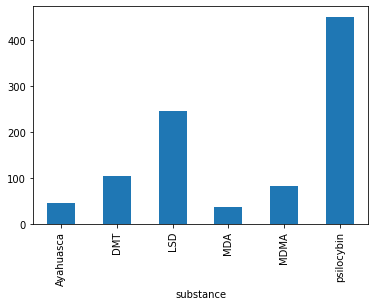

In [57]:
final_df.groupby('substance').substance_id.count().plot.bar(ylim=0)

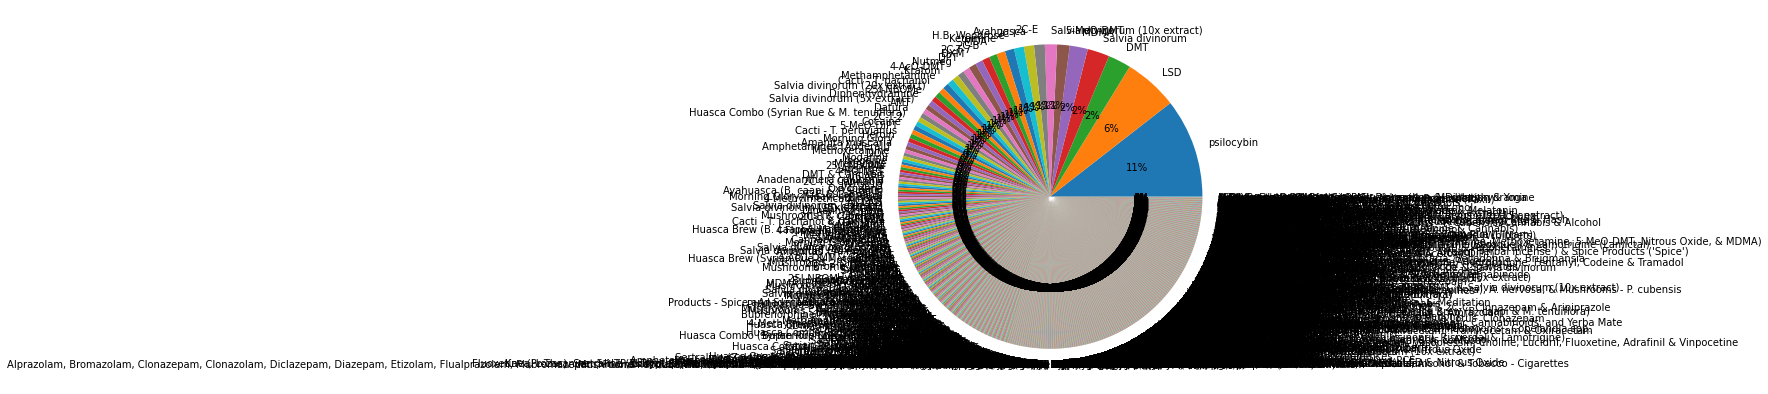

In [61]:
df2.substance.value_counts().plot(kind='pie', figsize=(8,7), autopct='%1.0f%%' )

In [62]:
sb_to_id.items()

dict_items([('psilocybin', 0), ('LSD', 1), ('MDMA', 2), ('MDA', 3), ('Ayahuasca', 4), ('DMT', 5)])

In [64]:
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5,norm='l2', encoding='latin-1', ngram_range=(1,2), stop_words='english')
features = tfidf.fit_transform(final_df['description']).toarray()


labels = final_df.substance_id

In [65]:
from sklearn.feature_selection import chi2
N = 7 


for sb, sb_id in sorted(sb_to_id.items()):
  features_chi2 = chi2(features, labels == sb_id)

  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]

  print("# '{}':".format(sb))
  print(" . Most correlated bigrams: \n     .{}".format('\n           .'.join(unigrams[-N:])))
  print(" . Most correlated bigrams: \n     .{}".format('\n           .'.join(bigrams[-N:])))

# 'Ayahuasca':
 . Most correlated bigrams: 
     .groceries
           .facebook
           .fills
           .compromised
           .toxins
           .rejuvenated
           .foliage
 . Most correlated bigrams: 
     .told experience
           .coherent thought
           .begin feeling
           .double dose
           .able break
           .water wash
           .pounds prescription
# 'DMT':
 . Most correlated bigrams: 
     .apb
           .crappy
           .curves
           .overheating
           .navigating
           .verbalize
           .cycling
 . Most correlated bigrams: 
     .work feel
           .00 got
           .chemical effects
           .bed long
           .wait till
           .scared going
           .times 2c
# 'LSD':
 . Most correlated bigrams: 
     .restraint
           .spiders
           .redosing
           .agitation
           .sexy
           .hemp
           .allergy
 . Most correlated bigrams: 
     .recreational drugs
           .quite bad
  

In [66]:
features_chi2

(array([0.25888347, 0.04153222, 0.00778243, ..., 0.16004463, 0.37975066,
        0.01273807]),
 array([0.61088827, 0.83851404, 0.92970336, ..., 0.68911543, 0.53773671,
        0.91013914]))

In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

from sklearn.model_selection import cross_val_score

models = [ 
          RandomForestClassifier(n_estimators = 200, max_depth = 100, random_state=0),
          MultinomialNB(),
          LogisticRegression(random_state=30),
]

In [69]:
CV = 5

cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []

In [73]:
for model in models:
  model_name = model.__class__.__name__

  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv =CV )

  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))

In [75]:
from sklearn.model_selection import train_test_split

model = LogisticRegression(random_state=0)

X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, final_df.index, test_size = 0.33, random_state=42)

model.fit(X_train, y_train)


y_pred_proba = model.predict_proba(X_test)
y_pred = model.predict(X_test)

Model Accuracy:  0.4748427672955975


Text(0.5, 15.0, 'Predicted')

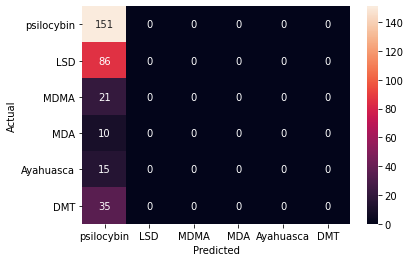

In [77]:
from sklearn.metrics import confusion_matrix, accuracy_score 
import seaborn as sns

print('Model Accuracy: ', accuracy_score(y_test, y_pred))

conf_mat = confusion_matrix(y_test, y_pred)

sns.heatmap(conf_mat, annot=True, fmt = 'd', xticklabels = sb_id_df.substance.values, yticklabels = sb_id_df.substance.values)

plt.ylabel('Actual')
plt.xlabel("Predicted")

In [79]:
from IPython.display import display

for predicted in sb_id_df.substance_id:
  for actual in sb_id_df.substance_id:
    if predicted != actual and conf_mat[actual, predicted] >= 2:
      print("'{}' predicted as '{}' : {} examples.".format(id_to_sb[actual], id_to_sb[predicted],conf_mat[actual, predicted]))

      display(final_df.loc[indices_test[(y_test == actual) & (y_pred == predicted)]]['description'])
      print('')

'LSD' predicted as 'psilocybin' : 86 examples.


1261                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    


'MDMA' predicted as 'psilocybin' : 21 examples.


2968                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    


'MDA' predicted as 'psilocybin' : 10 examples.


2114                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    


'Ayahuasca' predicted as 'psilocybin' : 15 examples.


216                                                                                                                                                                                                                                                                            My Background: Fascinated with tryptamines, dreams, and the exploration of my mind (the last two from a young age); experienced with many different psychedelics.\r PRELUDE:\r The following write-up is a collection of most of the DMT experiences I have had over the past two years. I went through a time period where I was using DMT fairly often because I was so interested in the unique experiences it offered as a psychedelic, and I have realized now that it's best to not use it as frequently. I base this on the fact that I now have a higher tolerance than I used to, and breaking through at some points became very hit or miss (sometimes even when I took hit after hit, it's almost as if I only broke through at certain times


'DMT' predicted as 'psilocybin' : 35 examples.


4278                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    